In [73]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import os

all_files = []
for file in os.listdir("./twitter_data"):
    if file.endswith(".csv"):
        all_files.append(os.path.join("./twitter_data", file))

print(all_files)
all_tweets_df = pd.concat((pd.read_csv(f) for f in all_files)).sort_values(by=['username', 'date'])
print(all_tweets_df[['username']].nunique())
all_tweets_df.sample(20)
all_tweets_df[['date']]



['./twitter_data/gotracz.csv', './twitter_data/katarzynaobara.csv', './twitter_data/martalempart.csv', './twitter_data/michalakjerzy.csv', './twitter_data/rozeckapl.csv', './twitter_data/sutrykjacek.csv']
username    6
dtype: int64


,date
175,2018-01-04
172,2018-01-05
173,2018-01-05
174,2018-01-05
170,2018-01-07
171,2018-01-07
168,2018-01-09
169,2018-01-09
166,2018-01-10
167,2018-01-10


['GoTracz' 'KatarzynaObara' 'MichalakJerzy' 'RozeckaPL' 'SutrykJacek'
 'martalempart']


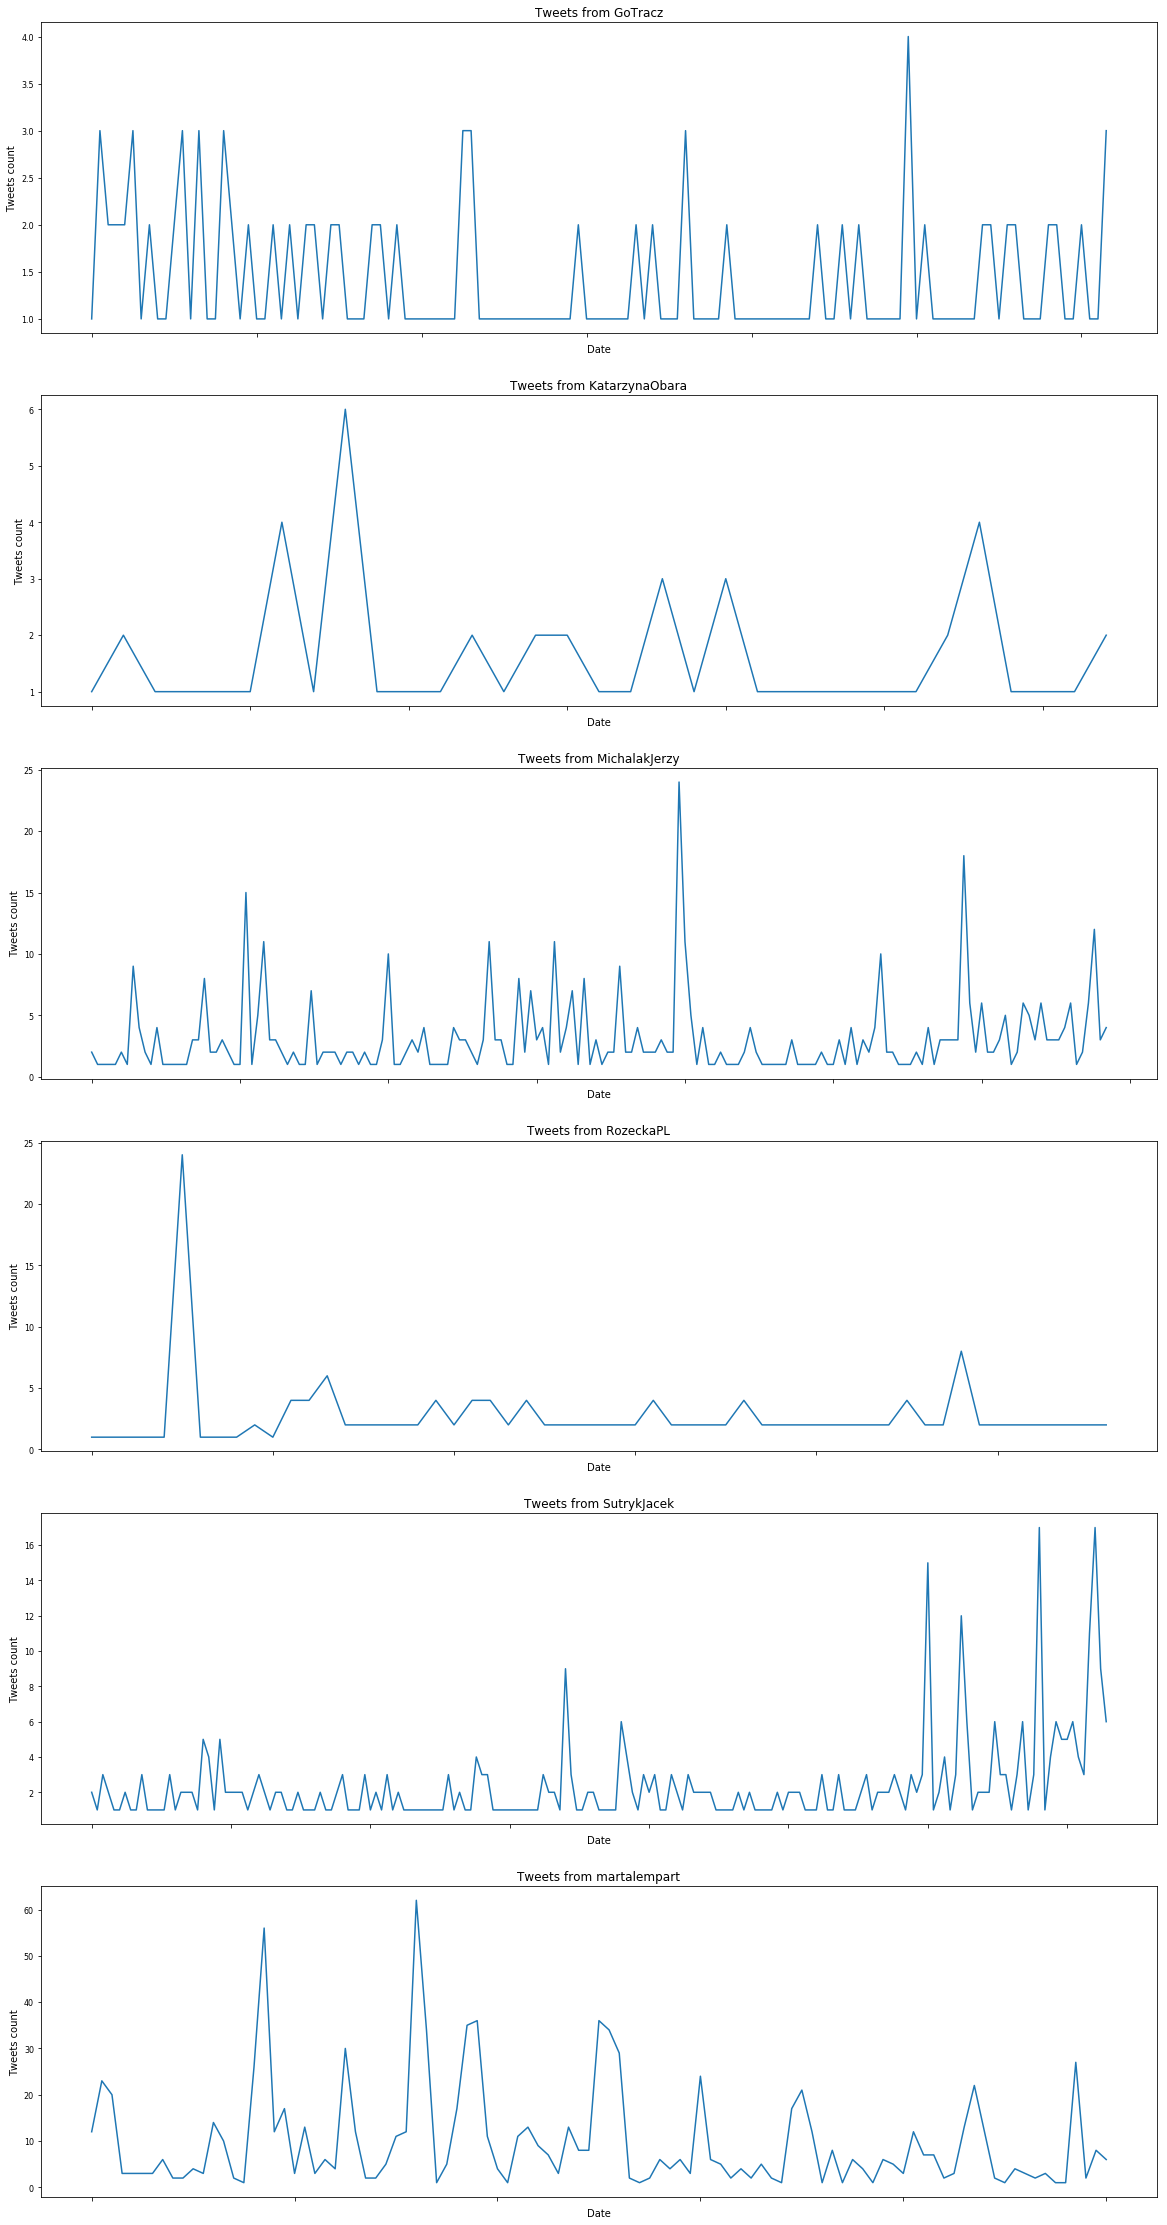

In [75]:
candidates_data = all_tweets_df[['date', 'time', 'username', 'tweet', 'likes', 'retweets', 'replies']]
candidates_count = candidates_data['username'].nunique()
candidates_usernames = candidates_data['username'].unique()
print(candidates_usernames)

fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 40))
summary_plot_data = []

for i in range(candidates_count):
    candidate_data = candidates_data[candidates_data['username'].str.contains(candidates_usernames[i])]
    candidate_tweets = candidate_data.groupby('date').count()
    plot_data = candidate_data[['date','username']].set_index('date').groupby('date').count()
    plot_data.name = candidates_usernames[i]
    ax = plot_data.plot(title="Tweets from " + plot_data.name, ax=axes[i], rot=90, fontsize=8, legend=False, use_index=True)
    summary_plot_data.append(plot_data)
    ax.set(xlabel="Date", ylabel="Tweets count")

    candidate_tweets.reset_index(inplace=True)
    

            likes  retweets
date                       
2018-01-04      7         4
2018-01-05     21         9
2018-01-07    108        21
2018-01-09     38         7
2018-01-10     49        19
2018-01-11     90        32
2018-01-12     10         2
2018-01-13     78        14
2018-01-14     41        12
2018-01-15     58        20
2018-01-17    205        80
2018-01-19     37         9
2018-01-21     18         2
2018-01-23     62         8
2018-01-24     11         4
2018-01-27      5         2
2018-01-28     71        14
2018-01-29     59        10
2018-02-02     25         4
2018-02-03     36         9
2018-02-05     22         3
2018-02-06     29         5
2018-02-10     51        10
2018-02-12     15         6
2018-02-14     69        18
2018-02-16     23         5
2018-02-17     53        13
2018-02-22    176        38
2018-02-26     31         7
2018-02-27     21         7
...           ...       ...
2018-07-30     57        19
2018-08-01     13         1
2018-08-02     14   

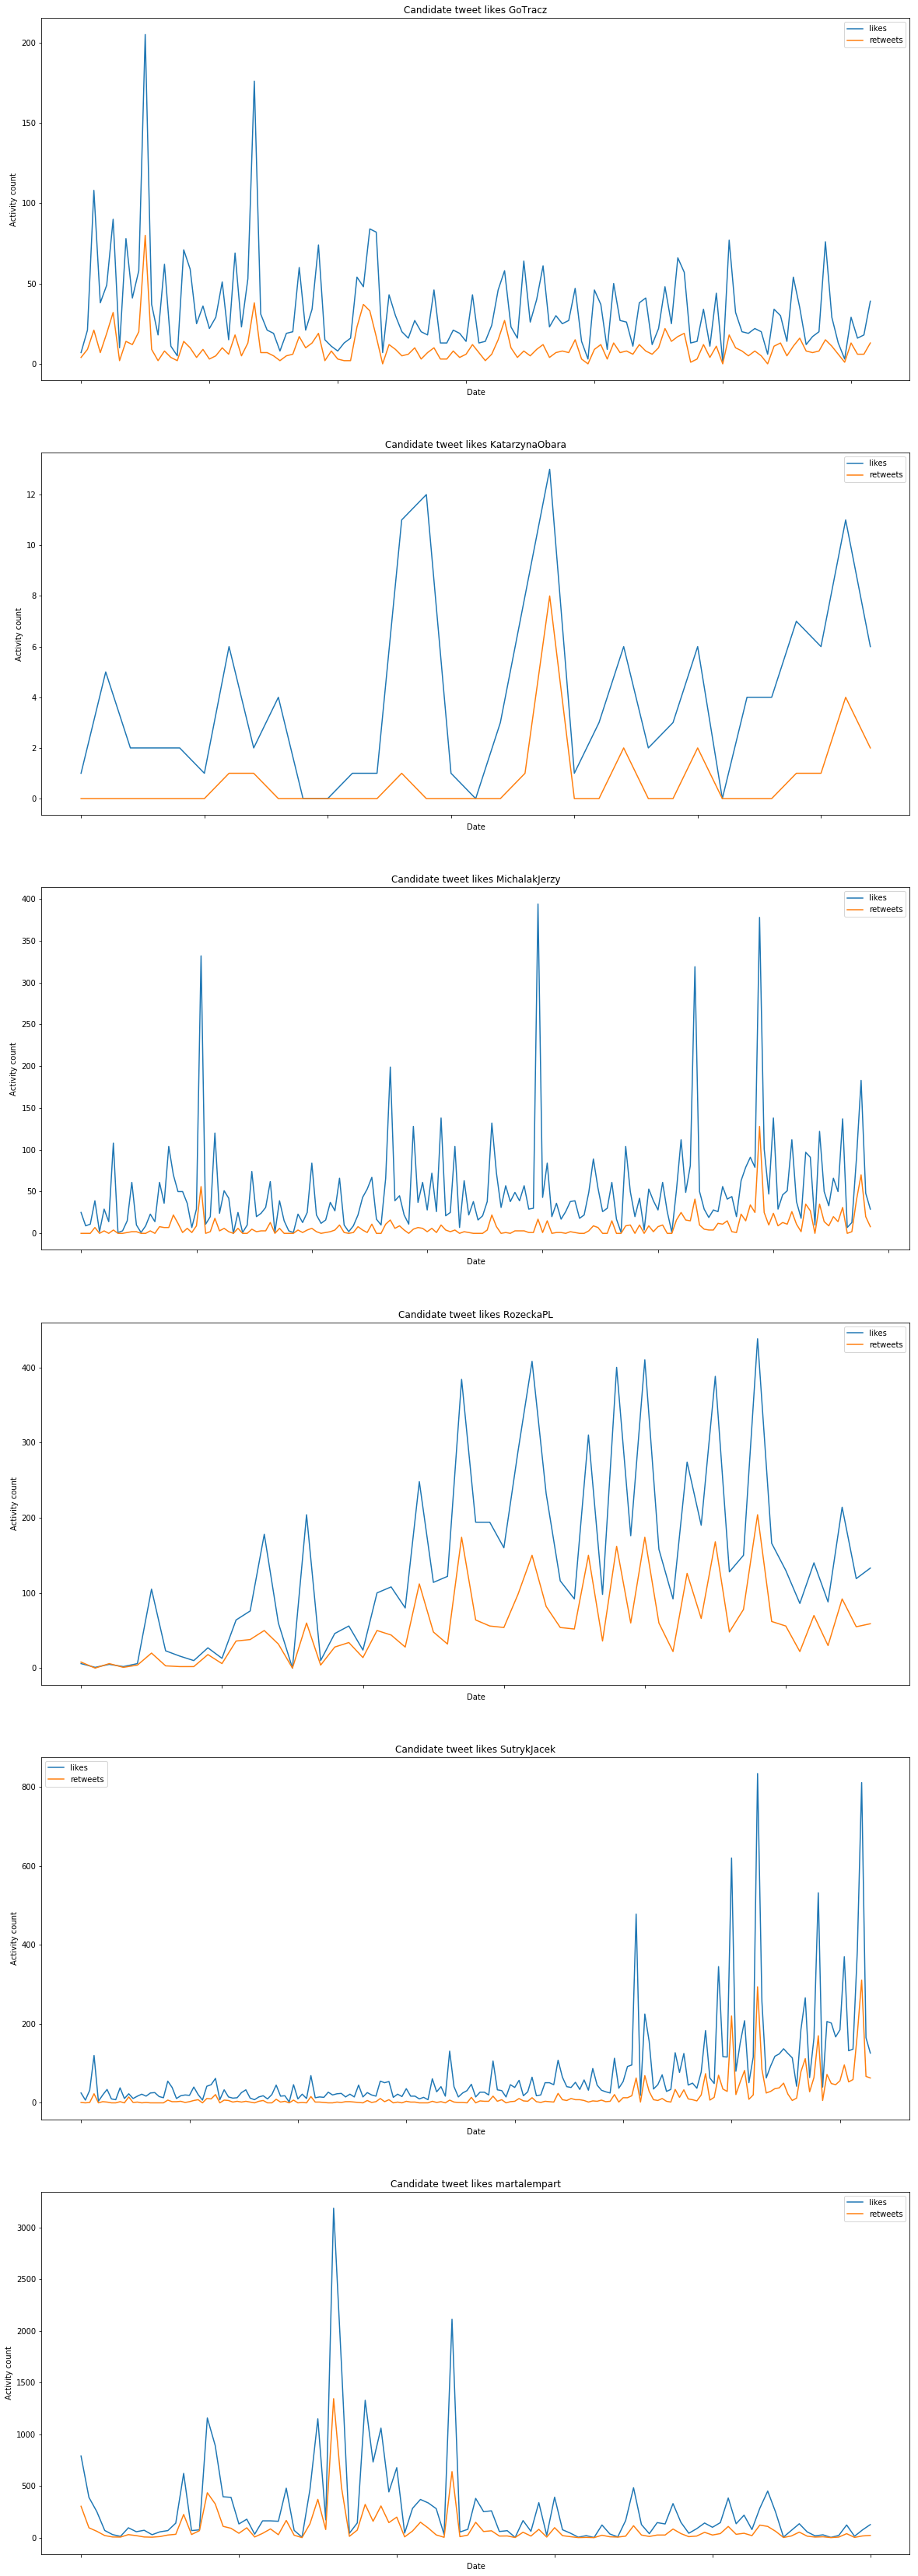

In [76]:
fig, axes = plt.subplots(nrows=candidates_count, ncols=1, figsize=(20, 60))

for i in range(candidates_count):
    candidate_data = candidates_data[candidates_data['username'].str.contains(candidates_usernames[i])]
    
    tweets_popularity = candidate_data.pivot_table(index='date', values=['retweets', 'likes'], aggfunc=np.sum)
    print(tweets_popularity)
    tweets_popularity.reset_index(inplace=True)
    
    ax = tweets_popularity[['date','likes','retweets']].set_index('date').plot(title='Candidate tweet likes ' + candidates_usernames[i], ax=axes[i])
    ax.set(xlabel="Date", ylabel="Activity count")